In [28]:
%matplotlib notebook 
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

import numpy as np
import blackout_utils as bu

import torch

In [87]:
def draw_step(tokens):
    tokens = list( tokens.detach().numpy() )
    smiles = tokenizer.decode(tokens,skip_special_tokens=True,
                             clean_up_tokenization_spaces=True).replace(' ','')
    try:
        molecule = Chem.MolFromSmiles(smiles)
        im = Draw.MolToImage(molecule)
    except:
        im = [[]]
    ax[0].imshow(im)
    ax[0].axis('off')
    ax[1].text(0,.5,smiles)
    ax[1].axis('off')
    ax[2].text(0,.5, tokens[:6])
    ax[2].text(0,.25, tokens[6:])

    ax[2].axis('off')

<IPython.core.display.Javascript object>


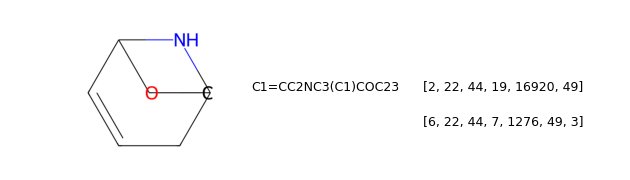

In [55]:
smiles = 'C1=CC2NC3(C1)COC23'
tokenizer = bu.get_tokenizer('../../etc/tokenizers/tokenizer')
tokenized_smiles = tokenizer(smiles)
molecule = Chem.MolFromSmiles(smiles)

# plot using RDKit 
im = Draw.MolToImage(molecule)
# f,ax = plt.subplots(1,3, figsize=(7,2) )
draw_step(tokenized_smiles['input_ids'])


In [94]:
from importlib import reload

In [26]:
schedule = bu.get_binomial_corrupter('../schedules/binomial_corrupter_files.npz')

In [79]:
times = schedule['observation_times'][::100]

In [99]:
reload(bu)
tokens = np.array(tokenized_smiles['input_ids'])
unique = np.unique(tokens)
tokens = torch.LongTensor(tokens)


for i,t in enumerate(times): 
    cdf = schedule['noise_cdf'][int(100*i),:,tokens.long()]
    u = torch.Tensor(np.random.rand(len(tokens)))
    tokens = torch.argmax((u<cdf).long(),dim=0).int()

IndexError: index 1276 is out of bounds for dimension 0 with size 421

In [78]:
len(times)

100